<a href="https://colab.research.google.com/github/alinesm/Attrition_Study/blob/main/Machine_Learning_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.xlsx to Dataset.xlsx


In [3]:
import io
import pandas as pd

In [4]:
dataset = pd.read_excel(io.BytesIO(uploaded['Dataset.xlsx']))
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
!pip install pycaret

In [6]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [7]:
dataset.shape

(1470, 35)

In [10]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data para treinar modelo: ' + str(data.shape))
print('Data para validar final (data não usado no treinamento do modelo): ' + str(data_unseen.shape))

Data para treinar modelo: (1396, 35)
Data para validar final (data não usado no treinamento do modelo): (74, 35)


In [12]:
#importar modelos de classificação do pycaret
from pycaret.classification import *

In [ ]:
#limpeza do dataset. Ajuste dos tipos de variável e remoção de variáveis desnecessárias
environment = setup(data = data, target = 'Attrition', session_id=1, numeric_features = ['NumCompaniesWorked', 'PercentSalaryHike','TrainingTimesLastYear','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'], ignore_features = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

In [14]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8864,0.8489,0.4650,0.7150,0.5547,0.4942,0.5135,0.033
ada,Ada Boost Classifier,0.8813,0.8169,0.4517,0.6693,0.5340,0.4703,0.4846,0.157
ridge,Ridge Classifier,0.8762,0.0000,0.2788,0.8100,0.4072,0.3562,0.4233,0.018
lr,Logistic Regression,0.8680,0.7955,0.2779,0.7314,0.3856,0.3290,0.3826,0.669
et,Extra Trees Classifier,0.8670,0.8232,0.1721,0.8250,0.2827,0.2439,0.3371,0.507
gbc,Gradient Boosting Classifier,0.8639,0.8154,0.2912,0.6474,0.3884,0.3263,0.3647,0.322
rf,Random Forest Classifier,0.8628,0.8183,0.1458,0.7967,0.2434,0.2077,0.3008,0.549
lightgbm,Light Gradient Boosting Machine,0.8618,0.8323,0.2650,0.6548,0.3678,0.3062,0.3503,0.137
knn,K Neighbors Classifier,0.8301,0.5893,0.0729,0.3017,0.1166,0.0598,0.0791,0.123
svm,SVM - Linear Kernel,0.7992,0.0000,0.0983,0.0394,0.0535,0.0139,0.0191,0.029


Logo, o melhor modelo segundo o parâmetro padrão do pycaret (Accuracy) é o LDA.
Accuracy(Acurácia): indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente.

In [15]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.8562,0.4000,0.5455,0.4615,0.3814,0.3875
1,0.8571,0.7791,0.5333,0.5333,0.5333,0.4490,0.4490
2,0.8980,0.8691,0.5333,0.7273,0.6154,0.5582,0.5671
3,0.8980,0.8643,0.4667,0.7778,0.5833,0.5293,0.5518
4,0.8878,0.8940,0.4000,0.7500,0.5217,0.4647,0.4943
5,0.8980,0.9382,0.4000,0.8571,0.5455,0.4964,0.5424
6,0.8571,0.7561,0.2500,0.6667,0.3636,0.3014,0.3478
7,0.9278,0.8098,0.6000,0.9000,0.7200,0.6805,0.6989
8,0.8866,0.7927,0.4667,0.7000,0.5600,0.4979,0.5114
9,0.8969,0.9293,0.6000,0.6923,0.6429,0.5830,0.5850


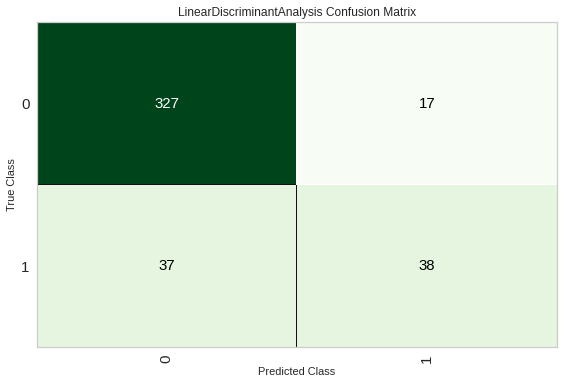

In [16]:
plot_model(lda, plot = 'confusion_matrix')

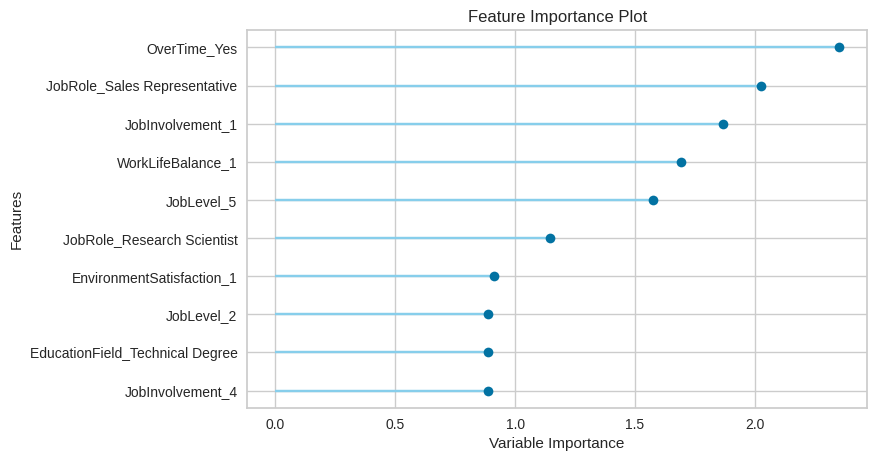

In [17]:
plot_model(lda, plot='feature')

In [20]:
# ajustes finais necessários pelo pycaret
final_lda = finalize_model(lda)

In [23]:
# validação final com os dados nunca testados pelo modelo e apresentar as primeiras previsões retornadas pelo modelo
final_validation_unseen_data = predict_model(final_lda, data=data_unseen)
final_validation_unseen_data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Label,Score
0,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6,No,0.8990
1,22,No,Non-Travel,1123,Research & Development,16,2,Medical,1,22,4,Male,96,4,1,Laboratory Technician,4,Divorced,2935,7324,1,Y,Yes,13,3,2,80,2,1,2,2,1,0,0,0,No,0.8427
2,46,No,Travel_Frequently,1211,Sales,5,4,Marketing,1,62,1,Male,98,3,2,Sales Executive,4,Single,5772,20445,4,Y,Yes,21,4,3,80,0,14,4,3,9,6,0,8,No,0.5859
3,23,No,Travel_Rarely,541,Sales,2,1,Technical Degree,1,113,3,Male,62,3,1,Sales Representative,1,Divorced,2322,9518,3,Y,No,13,3,3,80,1,3,3,3,0,0,0,0,No,0.6490
4,46,Yes,Travel_Rarely,669,Sales,9,2,Medical,1,118,3,Male,64,2,3,Sales Executive,4,Single,9619,13596,1,Y,No,16,3,4,80,0,9,3,3,9,8,4,7,No,0.9874
5,28,No,Non-Travel,120,Sales,4,3,Medical,1,129,2,Male,43,3,2,Sales Executive,3,Married,4221,8863,1,Y,No,15,3,2,80,0,5,3,4,5,4,0,4,No,0.9781
6,56,Yes,Travel_Rarely,441,Research & Development,14,4,Life Sciences,1,161,2,Female,72,3,1,Research Scientist,2,Married,4963,4510,9,Y,Yes,18,3,1,80,3,7,2,3,5,4,4,3,No,0.7163
7,31,Yes,Travel_Rarely,542,Sales,20,3,Life Sciences,1,175,2,Female,71,1,2,Sales Executive,3,Married,4559,24788,3,Y,Yes,11,3,3,80,1,4,2,3,2,2,2,2,Yes,0.6111
8,33,No,Travel_Rarely,134,Research & Development,2,3,Life Sciences,1,242,3,Male,90,3,1,Research Scientist,4,Single,2500,10515,0,Y,No,14,3,1,80,0,4,2,4,3,1,0,2,No,0.9312
9,49,No,Non-Travel,1002,Research & Development,18,4,Life Sciences,1,275,4,Male,92,3,2,Manufacturing Director,4,Divorced,6804,23793,1,Y,Yes,15,3,1,80,2,7,0,3,7,7,1,7,No,0.9894


In [24]:
# calcula a Acurácia final do modelo no dataset nunca testado
from pycaret.utils import check_metric
check_metric(final_validation_unseen_data['Attrition'], final_validation_unseen_data['Label'], metric = 'Accuracy')

0.9054